In [1]:
! pip install qiskit[machine-learning]

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 25.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.7/148.7 kB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 62.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 18.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.7/112.7 kB 15.4 MB/s eta 0:00:00
  Created wheel for qiskit: filename=qiskit-0.44.0-py3-non

In [2]:
import numpy as np
import pandas as pd
# Importing standard Qiskit libraries
from qiskit import BasicAer
from qiskit.algorithms.optimizers import COBYLA, SPSA
from qiskit.circuit.library import RealAmplitudes, TwoLocal, ZFeatureMap, ZZFeatureMap
from qiskit_machine_learning.algorithms import QSVC, VQC
from qiskit_machine_learning.kernels import QuantumKernel
from qiskit_machine_learning.utils.loss_functions import CrossEntropyLoss
from qiskit.utils import QuantumInstance, algorithm_globals

<ipython-input-2-507f4f209c45>:5: DeprecationWarning: ``qiskit.algorithms`` has been migrated to an independent package: https://github.com/qiskit-community/qiskit-algorithms. The ``qiskit.algorithms`` import path is deprecated as of qiskit-terra 0.25.0 and will be removed no earlier than 3 months after the release date. Please run ``pip install qiskit_algorithms`` and use ``import qiskit_algorithms`` instead.
  from qiskit.algorithms.optimizers import COBYLA, SPSA


In [11]:
# Importing classical ML libraries
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, mean_squared_error
from sklearn.linear_model import LogisticRegression

#MINST DATASET

MNIST Sample Images


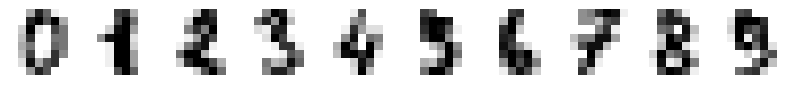

In [10]:
# loading the MNIST dataset from the sklearn package
digits = datasets.load_digits()

print('MNIST Sample Images')

# converting the 8x8 array of a number to an image
_, axes = plt.subplots(nrows=1, ncols=10, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")

In [12]:
# Here, we assign our data (the arrays representing the handwritten numbers) to the X variable
# and assign the class labels (the number value) to the y variable
X = digits.data
y = digits.target

# Splitting our data: 75% being used for training and 25% being used for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [14]:
def ML_Model():
    k =  2
    model = KNeighborsClassifier(n_neighbors= k)

    model.fit(X_train, y_train) ## FILL IN YOUR CODE HERE
    pred = model.predict( X_test) ## FILL IN YOUR CODE HERE

    return k, pred

k, pred = ML_Model()
acc = accuracy_score(y_test, pred)
print(f'K = {k}; Accuracy: {acc}')

K = 2; Accuracy: 0.9844444444444445


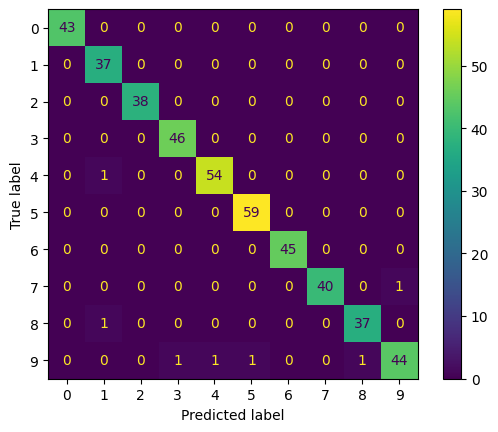

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming ml_model is a tuple containing (confusion_matrix, classes)

cm = confusion_matrix(y_test, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

#Diabetes dataset

In [22]:
diabetes = datasets.load_diabetes(as_frame=True)
X_diabetes = diabetes.data
y_diabetes = diabetes.target
X_diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [35]:
diabetes = datasets.load_diabetes()
X_diabetes = diabetes.data
y_diabetes = diabetes.target

In [41]:
from sklearn.linear_model import LinearRegression
def ML_model2(X_diabetes, y_diabetes):

    X_train, X_test, y_train, y_test = train_test_split(X_diabetes, y_diabetes, test_size=0.25, random_state=42)

    model = LinearRegression()
    #model = KNeighborsClassifier(n_neighbors=3)
    model.fit(X_train, y_train)
    predictions_diabetes= model.predict( X_test)

    return y_test, predictions_diabetes

In [42]:
y_test, predictions_diabetes = ML_model2(X_diabetes, y_diabetes)

In [43]:
print(f'R2 score: {r2_score(y_test, predictions_diabetes)}')
print(f'Mean squared error: {mean_squared_error(y_test, predictions_diabetes)}')

R2 score: 0.4849058889476756
Mean squared error: 2848.3106508475053


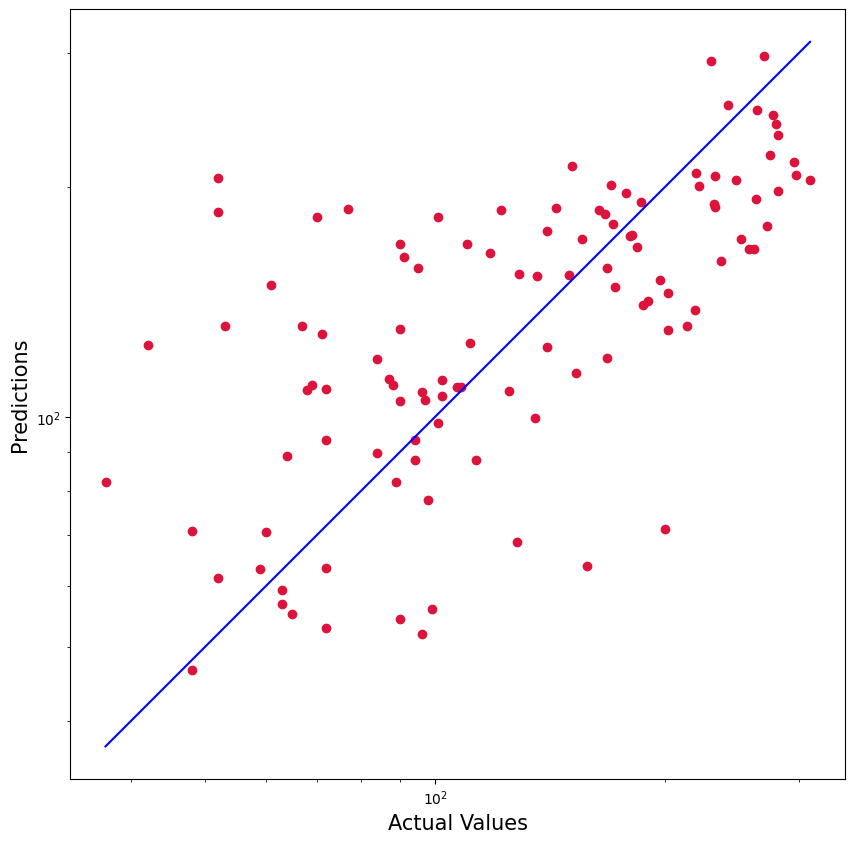

In [44]:
plt.figure(figsize=(10,10))
plt.scatter(y_test,  predictions_diabetes, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(predictions_diabetes), max(y_test))
p2 = min(min(predictions_diabetes), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [54]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

def ML_model2(X_diabetes, y_diabetes):

    X_train, X_test, y_train, y_test = train_test_split(X_diabetes, y_diabetes, test_size=0.25, random_state=42)

    #model = LinearRegression()
    #model = KNeighborsClassifier(n_neighbors=3)
    #model = SVR(kernel='linear')
    #model = RandomForestRegressor(n_estimators=100, random_state=42)
    #model = GradientBoostingRegressor(n_estimators=100, random_state=42)
    #model= DecisionTreeRegressor(random_state=42)
    model= KNeighborsRegressor(n_neighbors=5)
    model.fit(X_train, y_train)
    predictions_diabetes= model.predict( X_test)

    return y_test, predictions_diabetes

In [55]:
y_test, predictions_diabetes = ML_model2(X_diabetes, y_diabetes)
print(f'R2 score: {r2_score(y_test, predictions_diabetes)}')
print(f'Mean squared error: {mean_squared_error(y_test, predictions_diabetes)}')

R2 score: 0.44659346214225026
Mean squared error: 3060.166486486487


# Iris dataset

In [56]:
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

train_features, test_features, train_labels, test_labels = train_test_split(X, y, train_size=0.25, shuffle=True)

In [57]:
# number of qubits is equal to the number of features
num_qubits = 2

# number of steps performed during the training procedure
tau = 100

# regularization parameter
C = 1000

algorithm_globals.random_seed = 12345

In [58]:
from qiskit import BasicAer
from qiskit_machine_learning.kernels import QuantumKernel
backend = QuantumInstance(
    BasicAer.get_backend("statevector_simulator"),
    seed_simulator=algorithm_globals.random_seed,
    seed_transpiler=algorithm_globals.random_seed,
)



<ipython-input-58-c54cf0efe770>:3: DeprecationWarning: The class ``qiskit.utils.quantum_instance.QuantumInstance`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/qi_migration.
  backend = QuantumInstance(


In [59]:
def qml_model():

    feature_map = ZFeatureMap(feature_dimension=2, reps=2, insert_barriers=True)
    qkernel = QuantumKernel(feature_map=feature_map,
                             quantum_instance=backend)
    qsvc = QSVC(quantum_kernel=qkernel)

    return qsvc

qsvc = qml_model()

# training
qsvc.fit(train_features, train_labels)

# testing
qsvc_score = qsvc.score(test_features, test_labels)
print(f"QSVC classification test score: {qsvc_score}")

QSVC classification test score: 0.5752212389380531


In [60]:
wine_data = datasets.load_wine()
X_wine = wine_data.data[:-48]
y_wine = wine_data.target[:-48]

training_features_wine, test_features_wine, training_labels_wine, test_labels_wine = \
    train_test_split(X_wine, y_wine, train_size=100, shuffle=True)

# one hot encoding the training labels
b = np.zeros((training_labels_wine.size, training_labels_wine.max() + 1))
b[np.arange(training_labels_wine.size), training_labels_wine] = 1
training_labels_wine = b

# one hot encoding the testing labels
c = np.zeros((test_labels_wine.size, test_labels_wine.max() + 1))
c[np.arange(test_labels_wine.size), test_labels_wine] = 1
test_labels_wine = c

In [61]:
X_wine.shape

(130, 13)

In [63]:
feature_dim=13
seed=42

def qml_model2():
    #encode classical data in quantum state
    feature_map = ZZFeatureMap(feature_dimension=feature_dim, reps=2)
    ansatz= TwoLocal(13, ['ry', 'rz'], 'cz', reps=2)
    quantum_instance= BasicAer.get_backend('qasm_simulator')

    vqc = VQC(feature_map=feature_map,
              ansatz=ansatz,
              optimizer=COBYLA(maxiter=100),
              quantum_instance=quantum_instance
              )

    return vqc

vqc = qml_model2()

vqc.fit(training_features_wine, training_labels_wine)

score = vqc.score(test_features_wine, test_labels_wine)
print(f"Testing accuracy: {score:0.2f}")

Testing accuracy: 0.53
